Все значения в 14-м столбце являются числами.
Все значения в 15-м столбце являются числами.


Избирателей всего: 47562702, Проголосовало: 32014110, Явка - 67.3%
Минимальная явка - 0.4934519735341091, Максимальная явка - 0.8025879682179342


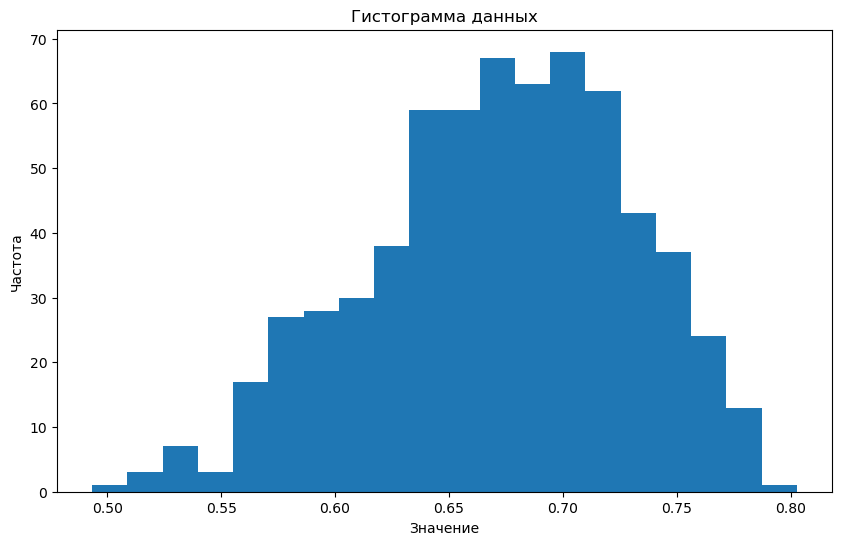

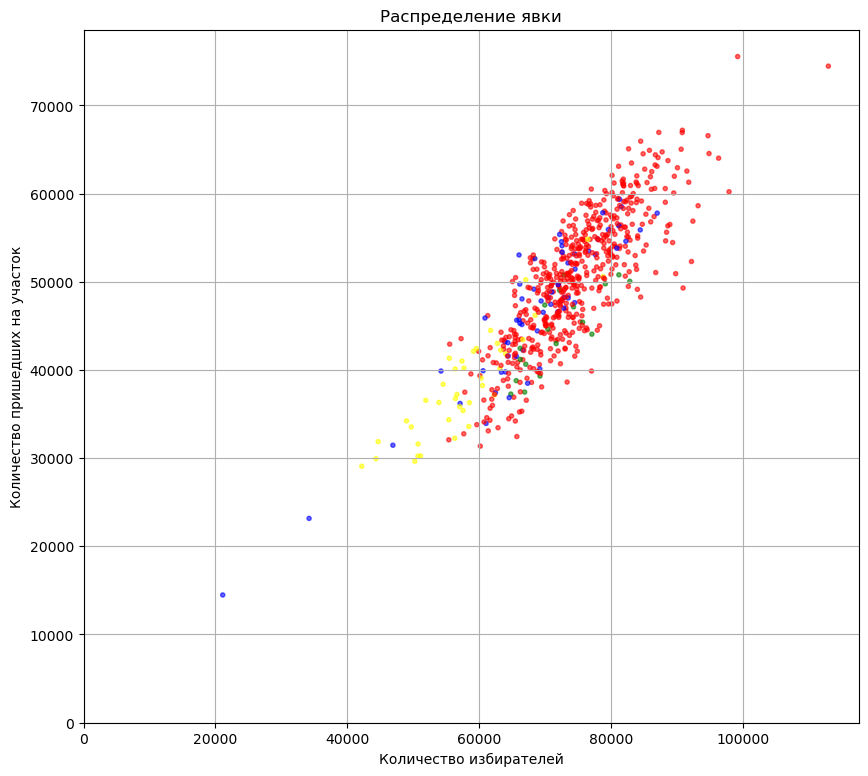

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np


elections = gpd.read_file('WPC_Dec_2019.geojson')

file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)

x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})

try:
    pd.to_numeric(x_values) 
    print("Все значения в 14-м столбце являются числами.")
except ValueError:
    print("В 14-м столбце есть выброс.")
try:
    pd.to_numeric(y_values) 
    print("Все значения в 15-м столбце являются числами.")
except ValueError:
    print("В 15-м столбце есть выброс.")
sum_x = sum(x_values)
sum_y = sum(y_values)
print(f"\n\nИзбирателей всего: {sum_x}, Проголосовало: {sum_y}, Явка - {100*sum_y/sum_x:.1f}%")
z_values = y_values/x_values
print(f"Минимальная явка - {np.min(z_values)}, Максимальная явка - {np.max(z_values)}")
plt.figure(figsize=(10, 6))
plt.hist(z_values, bins=20)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма данных')
plt.show()

plt.figure(figsize=(10, 9)) 
plt.scatter(x_values, y_values, c=df['Country name'],  s=9, alpha=0.6)  
plt.title('Распределение явки')  
plt.xlabel('Количество избирателей') 
plt.ylabel('Количество пришедших на участок')
plt.xlim(0, ) 
plt.ylim(0, ) 
plt.grid(True) 
plt.show() 

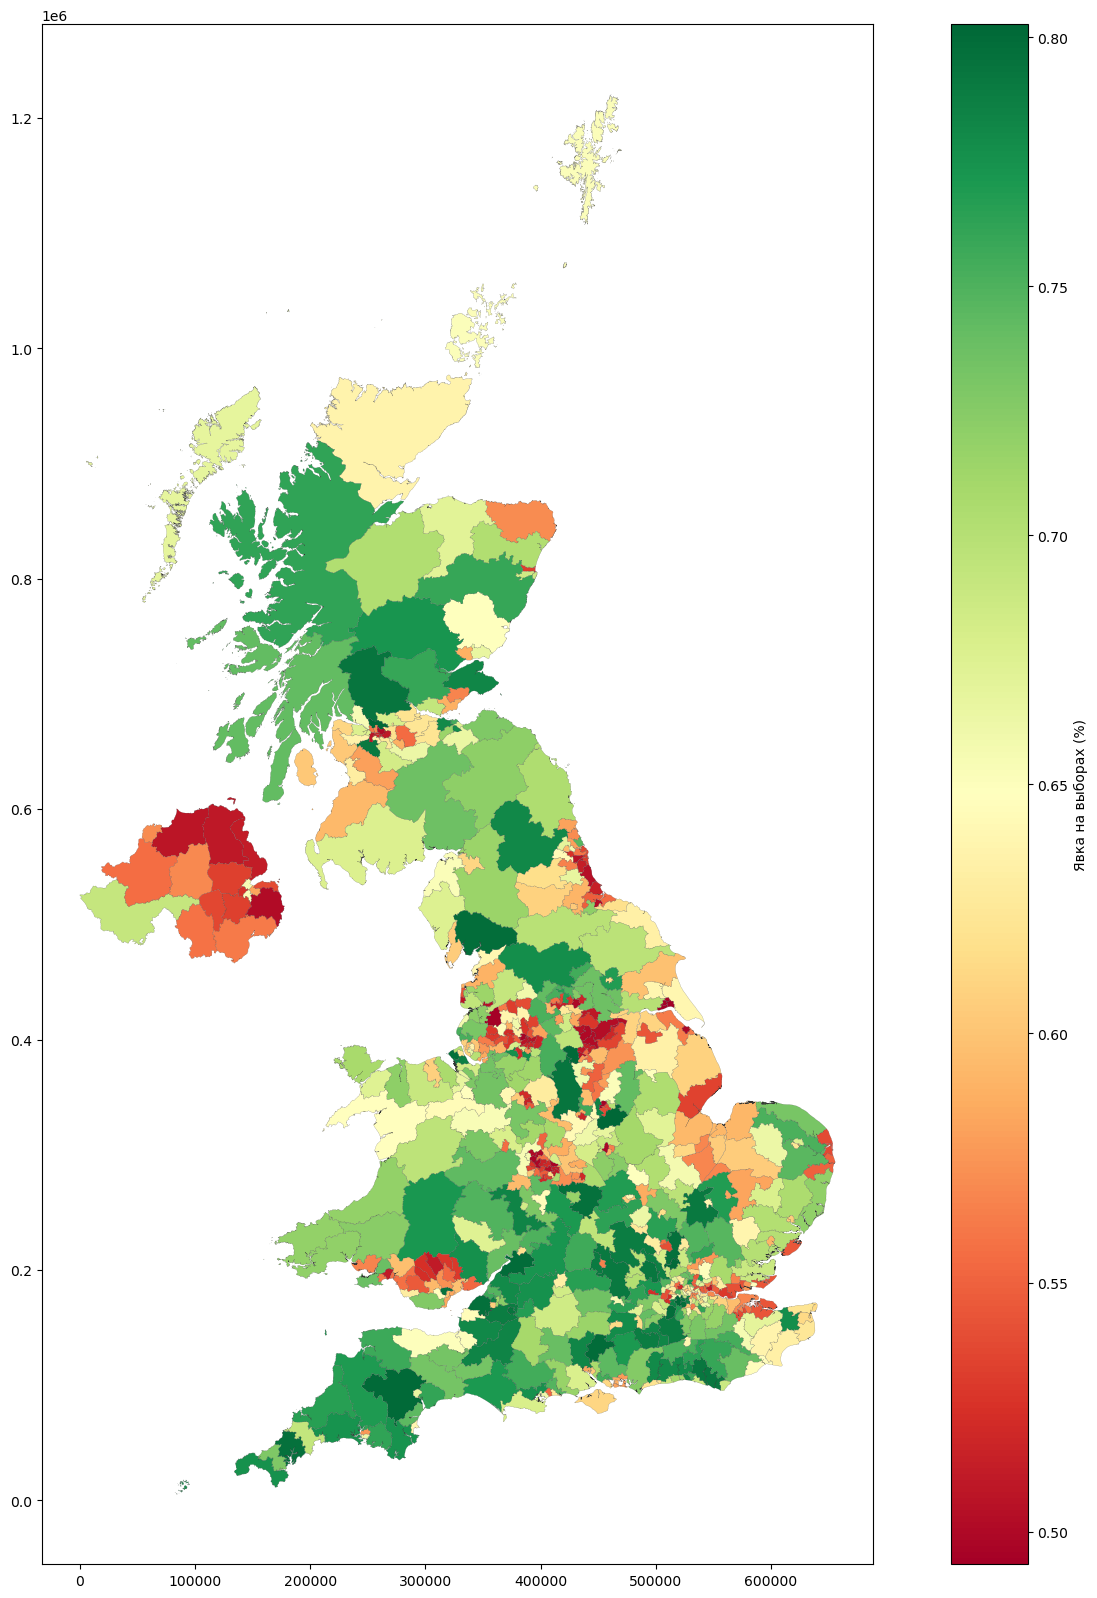

In [150]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

new_array = np.column_stack((df.iloc[:, 0], z_values))
turnout = pd.DataFrame(new_array, columns=['pcon19cd', 'turnout_percentage'])

merged_data = elections.merge(turnout, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(20, 20))

merged_data.plot(ax=ax, column='turnout_percentage', cmap='RdYlGn', linewidth=0.1, edgecolor='0.2',figsize=(20,20))


norm = Normalize(vmin=merged_data['turnout_percentage'].min(), vmax=merged_data['turnout_percentage'].max())
sm = cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)

cbar.set_label('Явка на выборах (%)')
plt.show()



В Северной Ирландии Избирателей всего: 1293971, Проголосовало: 799035, Явка - 61.8%

В Уэльсе избирателей всего: 2319826, Проголосовало: 1544357, Явка - 66.6%

В Англии избирателей всего: 39895849, Проголосовало: 26911657, Явка - 67.5%

В Шотландии избирателей всего: 4053056, Проголосовало: 2759061, Явка - 68.1%


a = 0.8147626248975248 b = -10427.808452775149 для England
England Оценка производительности модели на тестовой выборке: 0.6737041463323118
Квадратный корень из среднеквадратичной ошибки (RMSE): 4199.935124734234
Среднее абсолютное отклонение: 3357.3999467486015
Квадратный корень из MSE для фолда 1: 3575.495706738019
Квадратный корень из MSE для фолда 2: 4322.685183021692
Квадратный корень из MSE для фолда 3: 4241.01742852169
Квадратный корень из MSE для фолда 4: 3844.9024764808323
Квадратный корень из MSE для фолда 5: 4304.863802384518
Квадратный корень из MSE для фолда 6: 4854.307483363742
Средний квадратный корень из MSE: 4190.545346751748


a = 0.8198544408726599 b = -95

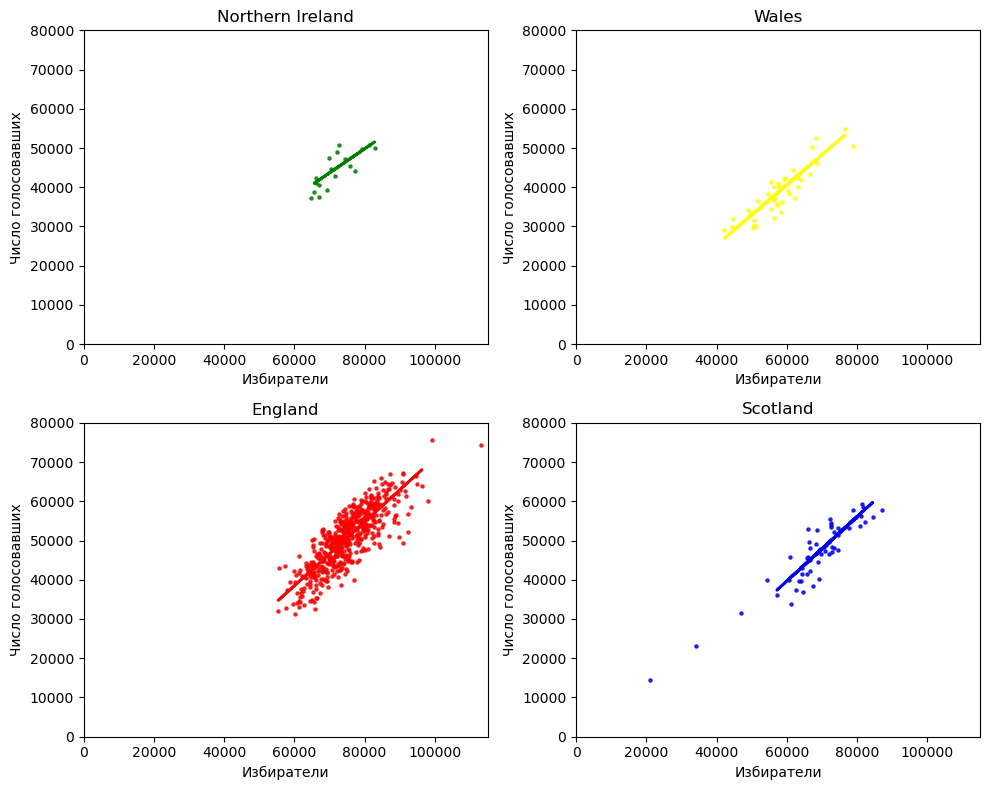

In [188]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import math
NorthIr = df.loc[df['Country name'] == 'green']
x_values = NorthIr.iloc[:, 14]  
y_values = NorthIr.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Северной Ирландии Избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

wales = df.loc[df['Country name'] == 'yellow']
x_values = wales.iloc[:, 14]  
y_values = wales.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Уэльсе избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

england = df.loc[df['Country name'] == 'red']
x_values = england.iloc[:, 14]  
y_values = england.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Англии избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

scotland = df.loc[df['Country name'] == 'blue']
x_values = scotland.iloc[:, 14]  
y_values = scotland.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Шотландии избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

def plot_distribution(data_array, subplot_num, name, clr):
    x_values = data_array.iloc[:, 14]  
    y_values = data_array.iloc[:, 15]  
    x_train, x_test, y_train, y_test = train_test_split(data_array.iloc[:, [14]].values.reshape(-1, 1), 
                                                    data_array.iloc[:, 15], 
                                                    test_size=0.3, 
                                                    random_state=41)

    model = LinearRegression()

    model.fit(x_train, y_train)
    a = model.coef_[0]
    b = model.intercept_

    # Вывод коэффициентов регрессии
    print(f"\n\na = {a} b = {b} для {name}")
    score = model.score(x_test, y_test)
    print(f"{name} Оценка производительности модели на тестовой выборке: {score}")

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    print("Квадратный корень из среднеквадратичной ошибки (RMSE):", rmse)

    absolute_deviation = np.abs(y_pred - y_test)
    mean_absolute_deviation = np.mean(absolute_deviation)
    print("Среднее абсолютное отклонение:", mean_absolute_deviation)
    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    cv_scores = -cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(cv_scores)

    for i, score in enumerate(cv_rmse_scores):
        print(f"Квадратный корень из MSE для фолда {i+1}: {score}")
    print("Средний квадратный корень из MSE:", np.mean(cv_rmse_scores))
    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=5, alpha=0.8, c = clr)  

    # Построение линии регрессии
    plt.plot(x_train, model.predict(x_train), color=clr, linewidth=2)

    plt.xlim(0, 115000)  
    plt.ylim(0, 80000)
    plt.xlabel('Избиратели')
    plt.ylabel('Число голосовавших')
    plt.title(name)
    
plt.figure(figsize=(10, 8))
plot_distribution(england, 3, 'England', 'Red')
plot_distribution(scotland, 4, 'Scotland', 'Blue')
plot_distribution(wales, 2, 'Wales', 'Yellow')
plot_distribution(NorthIr, 1, 'Northern Ireland', 'Green')
plt.tight_layout()
plt.show()






В Borough избирателей всего: 19218570, Проголосовало: 12496287, Явка - 65.0%

В Burgh избирателей всего: 1298206, Проголосовало: 852626, Явка - 65.7%

В County избирателей всего: 27045926, Проголосовало: 18665197, Явка - 69.0%


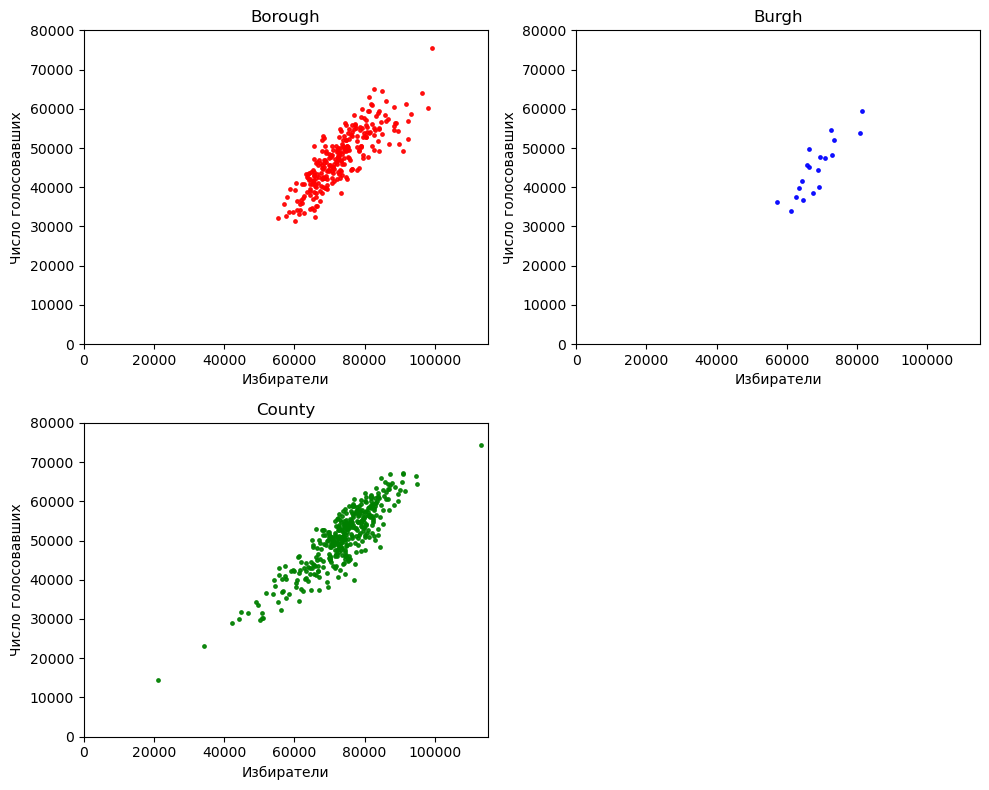

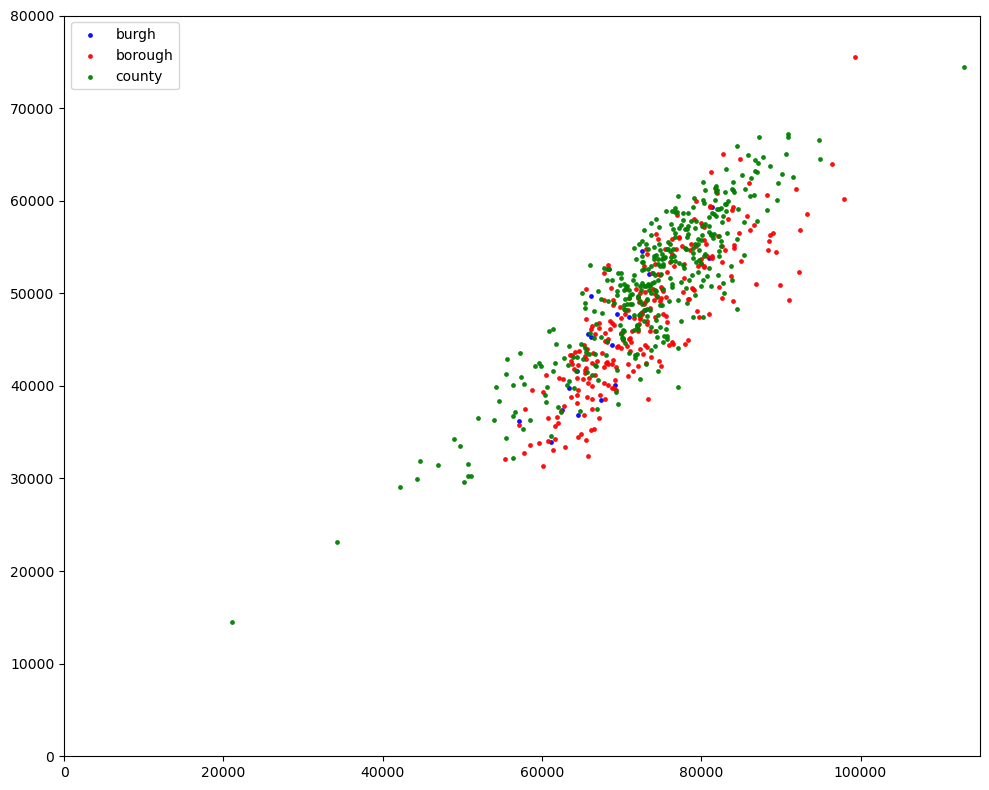

In [20]:
borough = df.loc[df['Constituency type'] == 'Borough']
x_values = borough.iloc[:, 14]  
y_values = borough.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Borough избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

burgh = df.loc[df['Constituency type'] == 'Burgh']
x_values = burgh.iloc[:, 14]  
y_values = burgh.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ Burgh избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

county = df.loc[df['Constituency type'] == 'County']
x_values = county.iloc[:, 14]  
y_values = county.iloc[:, 15]
xsum = sum(x_values)
ysum = sum(y_values)
print(f"\nВ County избирателей всего: {xsum}, Проголосовало: {ysum}, Явка - {100*ysum/xsum:.1f}%")

def plot_distribution(data_array, subplot_num, name, clr):

    x_values = data_array.iloc[:, 14] 
    y_values = data_array.iloc[:, 15]  
    plt.subplot(2, 2, subplot_num)
    plt.scatter(x_values, y_values, s=6, alpha=0.9, c = clr) 
    plt.xlim(0, 115000) 
    plt.ylim(0, 80000)
    plt.xlabel('Избиратели')
    plt.ylabel('Число голосовавших')
    plt.title(name)


plt.figure(figsize=(10, 8))
plot_distribution(burgh, 2, 'Burgh', 'Blue')
plot_distribution(borough, 1, 'Borough', 'Red')
plot_distribution(county, 3, 'County', 'Green')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(burgh.iloc[:, 14], burgh.iloc[:, 15], color='blue', label='burgh',s=6, alpha=0.9)
plt.scatter(borough.iloc[:, 14], borough.iloc[:, 15], color='red', label='borough',s=6, alpha=0.9)
plt.scatter(county.iloc[:, 14], county.iloc[:, 15], color='green', label='county',s=6, alpha=0.9)
plt.xlim(0, 115000)  
plt.ylim(0, 80000)
plt.legend()
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

55


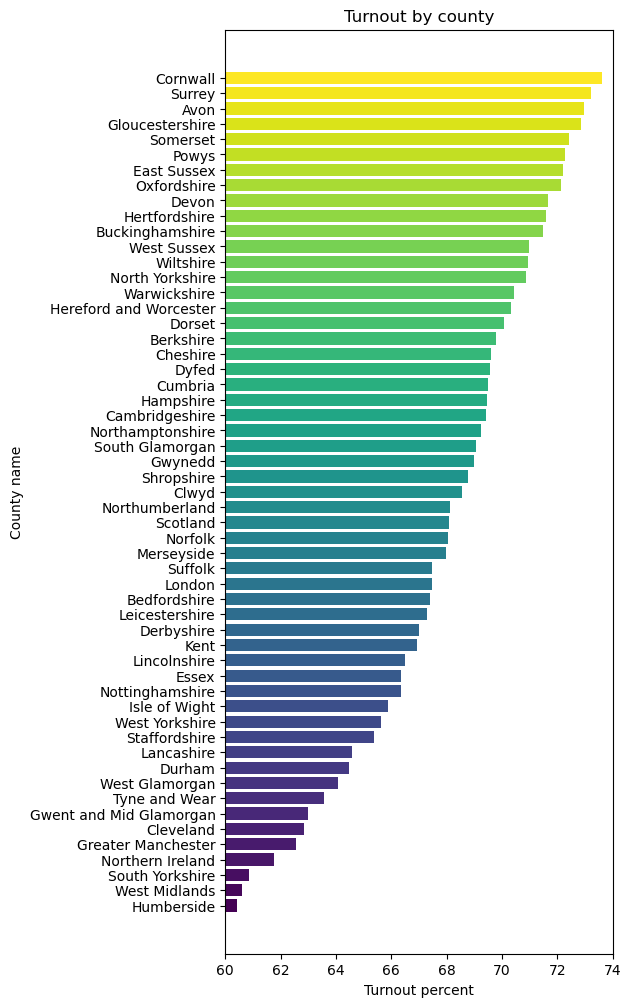

In [140]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 3])
turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 12))
sorted_turnout = sorted(turnout, key=lambda x: x[0])



percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.viridis(np.linspace(0, 1, len(percentages)))


plt.barh(names, percentages, color=colors)
plt.xlim(60, 74)  

plt.title('Turnout by county')
plt.xlabel('Turnout percent')
plt.ylabel('County name')


plt.show()

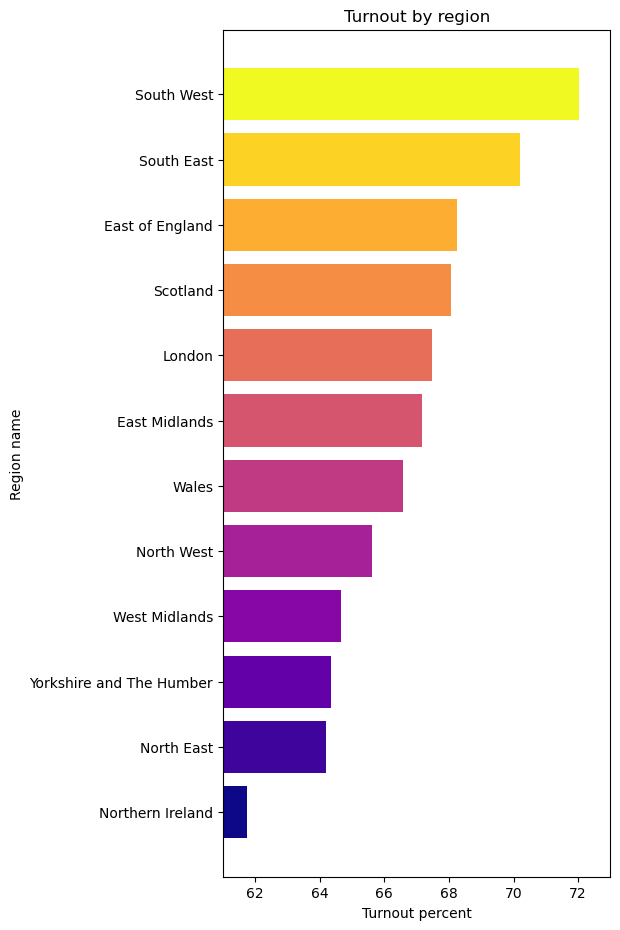

In [6]:
import pandas as pd

grouped = df.groupby(df.iloc[:, 4])


turnout=[]
for name, group in grouped:
    x_values = group.iloc[:, 14]  
    y_values = group.iloc[:, 15]
    xsum = sum(x_values)
    ysum = sum(y_values)
    turnout.append((100*ysum/xsum, name))
plt.figure(figsize=(5, 11))
sorted_turnout = sorted(turnout, key=lambda x: x[0])
percentages = [t[0] for t in sorted_turnout]
names = [t[1] for t in sorted_turnout]
colors = plt.cm.plasma(np.linspace(0, 1, len(percentages)))
plt.barh(names, percentages, color=colors)
plt.xlim(61, 73) 
plt.title('Turnout by region')
plt.xlabel('Turnout percent')
plt.ylabel('Region name')
plt.show()

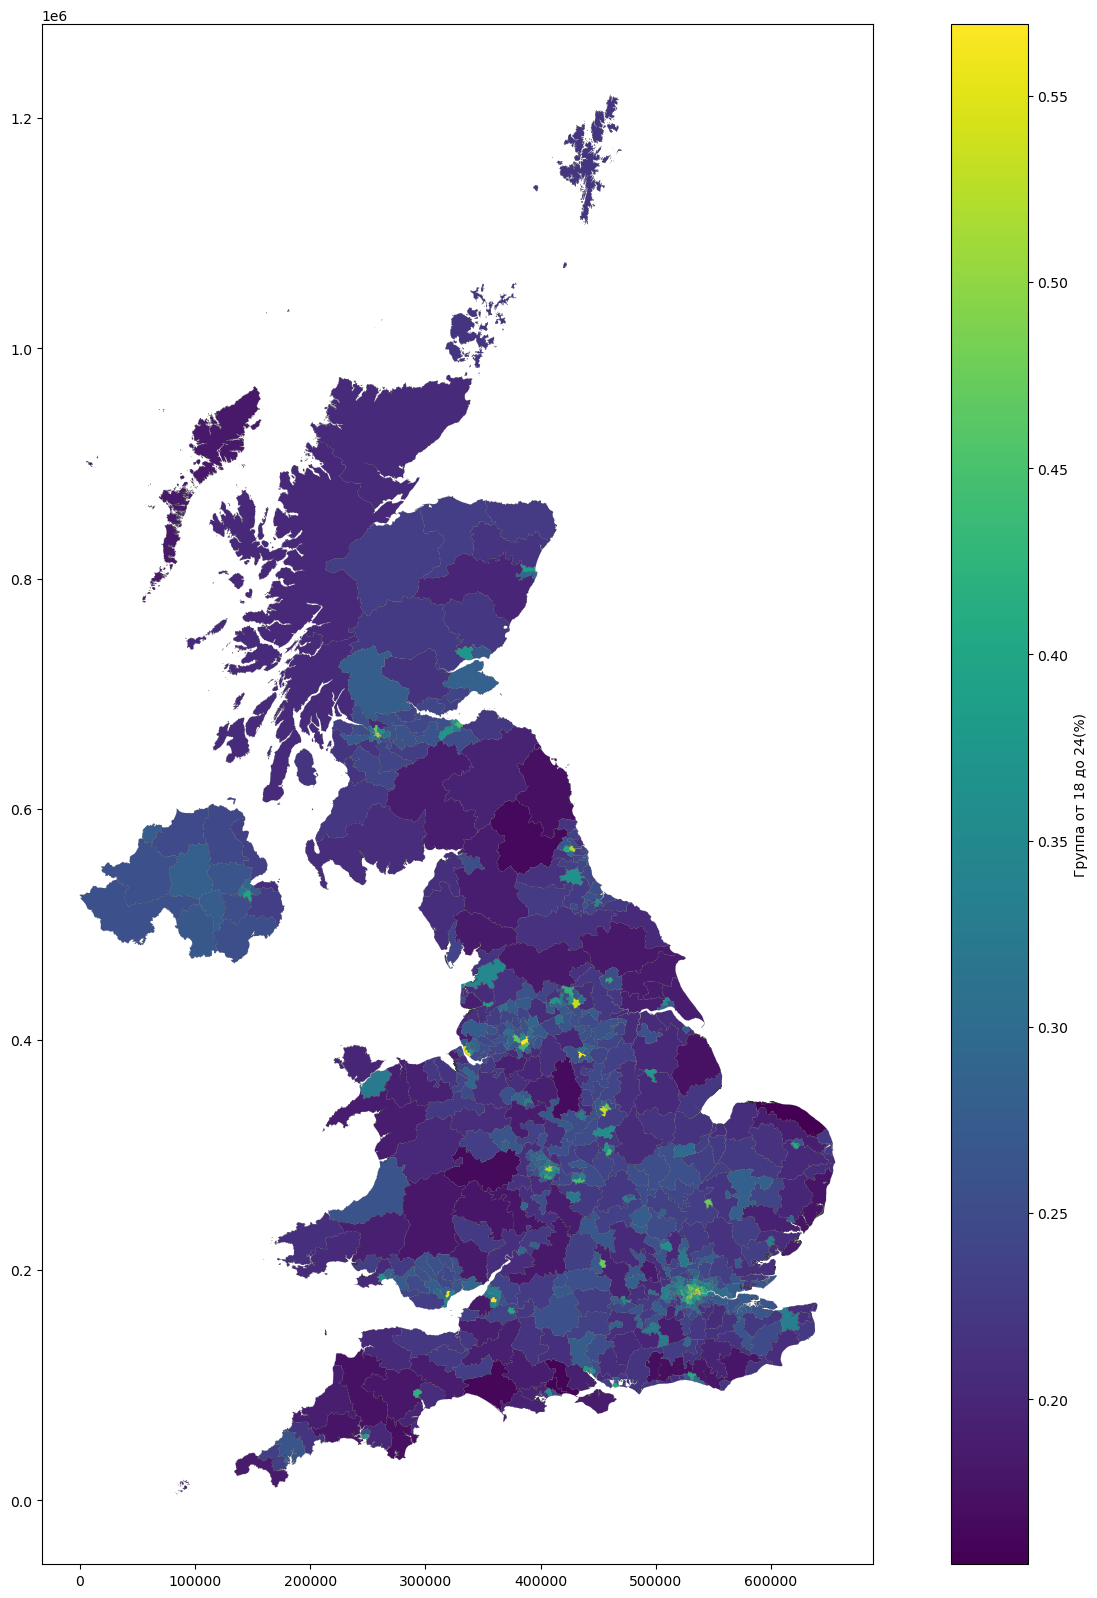

In [204]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd
df_second_sheet = pd.read_excel('population_by_age.xlsx', sheet_name=1)
f_df = df_second_sheet.loc[df_second_sheet['age'] == '0 to 17']
f_df = f_df.reset_index(drop=True)
f_df = f_df.iloc[:, [0, 8]]
filtered_df = df_second_sheet[df_second_sheet['age'].isin(['18 to 24', '25 to 34'])]
new_df = filtered_df.groupby('con_code')['con_pc'].sum().reset_index()
new_df['con_pc'] = new_df['con_pc'] / (1.0 - f_df['con_pc'])
elections = gpd.read_file('WPC_Dec_2019.geojson')
new_df.columns = ['pcon19cd', 'young_percentage']
merged_data = elections.merge(new_df, on='pcon19cd', how='left')
fig, ax = plt.subplots(figsize=(20, 20))
merged_data.plot(ax=ax, column='young_percentage', cmap='viridis', linewidth=0.1, edgecolor='0.2',figsize=(20,20))
norm = Normalize(vmin=merged_data['young_percentage'].min(), vmax=merged_data['young_percentage'].max())
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Группа от 18 до 24(%)')
plt.show()

            Constituency name     County name      Region name  \
33                 Canterbury            Kent       South East   
46             City Of Durham          Durham       North East   
75   Filton and Bradley Stoke            Avon       South West   
84                  Guildford          Surrey       South East   
109   Lancaster and Fleetwood      Lancashire       North West   
112       Leyton and Wanstead          London           London   
114              Loughborough  Leicestershire    East Midlands   
248               Walthamstow          London           London   
256           Welwyn Hatfield   Hertfordshire  East of England   
346                     Arfon         Gwynedd            Wales   

    Constituency type  
33             County  
46             County  
75             County  
84             County  
109            County  
112            County  
114            County  
248            County  
256            County  
346            County  
 Оценка п

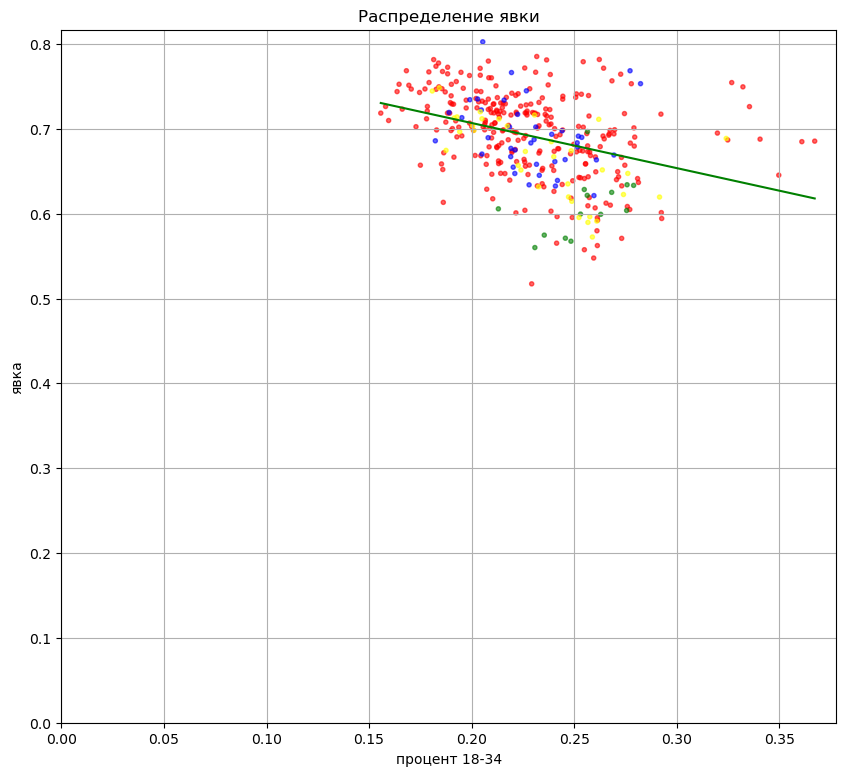

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
file_path = "HoC-GE2019-results-by-constituency.csv"
df = pd.read_csv(file_path)
df['Country name']= df.iloc[:, 5].replace({'England':'red', 'Wales':'yellow', 'Scotland':'blue', 'Northern Ireland':'green'})
df = df.sort_values(by=df.columns[0])
new_df = new_df.sort_values(by=new_df.columns[0])
df = df[df['Constituency type'] == 'County']
new_df = new_df[new_df.iloc[:, 0].isin(df.iloc[:, 0])]
df = df.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)
result = new_df[new_df.iloc[:, 1] > 0.3]
result2 = df[df.iloc[:, 0].isin(result.iloc[:, 0])]
selected_columns = result2.iloc[:, [2,3,4,6]]

print(selected_columns)
x_values = df.iloc[:, 14]  
y_values = df.iloc[:, 15] 
z_values = y_values/x_values
ass= new_df['young_percentage']

plt.figure(figsize=(10, 9)) 
plt.scatter(ass, z_values, s=9, c=df['Country name'], alpha=0.6)  
x_train, x_test, y_train, y_test = train_test_split(ass.values.reshape(-1, 1), 
                                                    z_values, 
                                                    test_size=0.2, 
                                                    random_state=43)
k = 6
model = KNeighborsRegressor(n_neighbors=k)
model.fit(x_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(x_test)

# Оценка производительности модели (например, MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
score = model.score(x_test, y_test)
print(f" Оценка производительности модели на тестовой выборке: {score}")
print("Квадратный корень из среднеквадратичной ошибки (RMSE):", rmse)

model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_[0]
b = model.intercept_

print(f"\n\na = {a} b = {b}")
score = model.score(x_test, y_test)
print(f" Оценка производительности модели на тестовой выборке: {score}")

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Квадратный корень из среднеквадратичной ошибки (RMSE):", rmse)

# Вычисление среднего абсолютного отклонения
absolute_deviation = np.abs(y_pred - y_test)
mean_absolute_deviation = np.mean(absolute_deviation)
print("Среднее абсолютное отклонение:", mean_absolute_deviation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = -cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_scores)

for i, score in enumerate(cv_rmse_scores):
    print(f"Квадратный корень из MSE для фолда {i+1}: {score}")
print("Средний квадратный корень из MSE:", np.mean(cv_rmse_scores))
# Задаем диапазон значений x
x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)

# Получаем предсказания для диапазона значений x
y_range_pred = model.predict(x_range)
plt.plot(x_range, y_range_pred, color='green', label='Regression Line')
plt.title('Распределение явки')  
plt.xlabel('процент 18-34')  
plt.ylabel('явка')  
plt.xlim(0, )  
plt.ylim(0, ) 

plt.grid(True) 

plt.show()  
